In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')
from joblib import dump #Save

---
## 인코딩 별 데이터

In [2]:
data_int = pd.read_csv('../dataset/app_int.csv') # Integer Encoding
data_bin = pd.read_csv('../dataset/app_bin.csv') # Binary Encoding
data_dum = pd.read_csv('../dataset/app_dum.csv') # One Hot Encoding

In [3]:
data_dum.columns

Index(['Unnamed: 0', 'Available_Age', 'Size', 'Price', 'Free', 'Rating',
       'Reviews', 'Category_Book', 'Category_Business',
       'Category_Developer Tools', 'Category_Education',
       'Category_Entertainment', 'Category_Finance', 'Category_Food & Drink',
       'Category_Games', 'Category_Graphics & Design',
       'Category_Health & Fitness', 'Category_Lifestyle',
       'Category_Magazines & Newspapers', 'Category_Medical', 'Category_Music',
       'Category_Navigation', 'Category_News', 'Category_Photo & Video',
       'Category_Productivity', 'Category_Reference', 'Category_Shopping',
       'Category_Social Networking', 'Category_Sports', 'Category_Stickers',
       'Category_Travel', 'Category_Utilities', 'Category_Weather'],
      dtype='object')

### 데이터 살펴보기

- 각 데이터 분포 시각화
- Reviews가 rating count로 이어지는지 확인 > 데이터 구간별 정리 고려

In [ ]:
# # Assuming data_int is your DataFrame and 'Rating' is a column in it
# # Step 1: Bin the 'Rating' data
# bins = pd.cut(data_int['Rating'], bins=np.arange(0, 5.5, 0.5))

# # Step 2: Count the values in each bin
# bin_counts = bins.value_counts().sort_index()

# # Step 3: Plot the counts
# bin_counts.plot(kind='bar')

In [4]:
# data_int[data_int['Reviews'] > 10].value_counts()

In [5]:
# pd.cut(data_int['Rating'], 
#        np.arange(0, 5.0, 0.5).value_counts().sort_index(ascending=True).plot(kind='bar'))

---
## 정수형 모델링

In [6]:
data_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546056 entries, 0 to 546055
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     546056 non-null  int64  
 1   Available_Age  546056 non-null  int64  
 2   Size           546056 non-null  int64  
 3   Price          546056 non-null  int64  
 4   Free           546056 non-null  bool   
 5   Rating         546056 non-null  float64
 6   Reviews        546056 non-null  int64  
 7   Cate_Int       546056 non-null  int64  
dtypes: bool(1), float64(1), int64(6)
memory usage: 29.7 MB


In [7]:
# 중복 확인
data_int.duplicated().any(), data_bin.duplicated().any(), data_dum.duplicated().any()

(False, False, False)

In [8]:
# data.drop(['Unnamed: 0','Category_0','Category_1','Category_2','Category_3','Category_4'], axis=1).boxplot()
# # 1.Reviews 2.Size 3.Price 순으로 수치의 차이가 크다.

In [35]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# # 리뷰수
# axes[0].pie(data_int['Reviews'], labels=data_int['Reviews'].index, autopct='%1.1f%%', startangle=90)
# axes[0].set_title('리뷰수')
# # 파일크기
# axes[1].pie(data_int['Size'], labels=data_int['Size'].index, autopct='%1.1f%%', startangle=90)
# axes[1].set_title('파일크기(MB)')
# # 가격
# axes[2].pie(data_int['Price'], labels=data_int['Price'].index, autopct='%1.1f%%', startangle=90)
# axes[2].set_title('가격')

# plt.tight_layout()
# plt.show()

KeyboardInterrupt: 

- Rating 0점,5점 등에 편향
- Reveiws, Size, Price 순으로 편향되어 있음.

In [9]:
X_int = data_int.drop(['Rating','Unnamed: 0'], axis=1)
y_int = data_int['Rating']

In [10]:
X_int,y_int

(        Available_Age  Size  Price   Free  Reviews  Cate_Int
 0                   1    13      0   True        1         1
 1                   4    25      0   True     1285         1
 2                   4    60      0   True     1839         1
 3                   1     3      2  False      242         4
 4                   4     2      1  False       21         1
 ...               ...   ...    ...    ...      ...       ...
 546051              1    39      0   True        1        12
 546052              1    92      0   True        7        12
 546053              1    16      0   True      143        12
 546054              1    37      0   True     1500        12
 546055              1    16      0   True        1        12
 
 [546056 rows x 6 columns],
 0         5.00
 1         4.78
 2         4.79
 3         4.67
 4         3.10
           ... 
 546051    5.00
 546052    4.43
 546053    3.92
 546054    4.83
 546055    4.00
 Name: Rating, Length: 546056, dtype: float64)

In [13]:
std_scaler = StandardScaler().fit_transform(X_int)
minmax_scaler = MinMaxScaler().fit_transform(X_int)
robust_scaler = RobustScaler().fit_transform(X_int)

std_scaled_df_int = pd.DataFrame(std_scaler, columns=X_int.columns)
minmax_scaled_df_int = pd.DataFrame(minmax_scaler, columns=X_int.columns)
robust_scaled_df_int = pd.DataFrame(robust_scaler, columns=X_int.columns)

In [13]:
# plt.figure(figsize=(18, 6))

# plt.subplot(1, 3, 1)
# plt.title('Standard Scaled Data')
# std_scaled_df.boxplot()
# plt.xticks(rotation=70)


# plt.subplot(1, 3, 2)
# plt.title('Min-Max Scaled Data')
# minmax_scaled_df.boxplot()
# plt.xticks(rotation=70)


# plt.subplot(1, 3, 3)
# plt.title('Robust Scaled Data')
# robust_scaled_df.boxplot()
# plt.xticks(rotation=70)


# plt.show()

In [14]:
robust_scaled_df_int
robust_scaled_df_int.columns

Index(['Available_Age', 'Size', 'Price', 'Free', 'Reviews', 'Cate_Int'], dtype='object')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(robust_scaled_df_int, y_int,
                                                    test_size=0.2,
                                                    random_state=13
                                                    )

In [17]:
# 모델 준비
LR_model = LinearRegression()
# SVR_model = SVR(kernel='linear', C=1, epsilon=0.1) # param조정
RFR_model = RandomForestRegressor()
DTR_model = DecisionTreeRegressor()
GBR_model = GradientBoostingRegressor()
XGB_model = XGBRegressor()
LGBM_model = LGBMRegressor()

In [18]:
# 피팅
LR_model.fit(X_train, y_train)

LinearRegression()

In [19]:
RFR_model.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
DTR_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
GBR_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [22]:
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [23]:
LGBM_model.fit(X_train, y_train)

LGBMRegressor()

In [24]:
# 예측
y_pred_lr = LR_model.predict(X_test)
y_pred_rfr = RFR_model.predict(X_test)
y_pred_dtr = DTR_model.predict(X_test)
y_pred_gbr = GBR_model.predict(X_test)
y_pred_xgb = XGB_model.predict(X_test)
y_pred_lgbm = LGBM_model.predict(X_test)
# y_pred_svr = SVR_model.predict(X_test)

In [25]:
# Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"RMSE : {rmse_lr:.4f}")
print(f"MAE : {mae_lr:.4f}")
print(f"MSE : {mse_lr:.4f}")

RMSE : 1.1919
MAE : 0.9539
MSE : 1.4206


In [26]:
# RandomForest
rmse_rfr = mean_squared_error(y_test, y_pred_rfr, squared=False)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

print(f"RMSE : {rmse_rfr:.4f}")
print(f"MAE : {mae_rfr:.4f}")
print(f"MSE : {mse_rfr:.4f}")

RMSE : 1.2293
MAE : 0.9341
MSE : 1.5111


In [27]:
# DecisionTreeRegression
rmse_dtr = mean_squared_error(y_test, y_pred_dtr, squared=False)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)

print(f"RMSE : {rmse_dtr:.4f}")
print(f"MAE : {mae_dtr:.4f}")
print(f"MSE : {mse_dtr:.4f}")

RMSE : 1.3438
MAE : 1.0030
MSE : 1.8059


In [28]:
# Gradient Boosting Regression
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

print(f"RMSE : {rmse_gbr:.4f}")
print(f"MAE : {mae_gbr:.4f}")
print(f"MSE : {mse_gbr:.4f}")

RMSE : 1.1648
MAE : 0.9167
MSE : 1.3567


In [29]:
rmse_xgb = mean_squared_error(y_test,y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"RMSE : {rmse_xgb:.4f}")
print(f"MAE : {mae_xgb:.4f}")
print(f"MSE : {mse_xgb:.4f}")

RMSE : 1.1560
MAE : 0.9005
MSE : 1.3364


In [30]:
rmse_lgbm = mean_squared_error(y_test,y_pred_lgbm, squared=False)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

print(f"RMSE : {rmse_lgbm:.4f}")
print(f"MAE : {mae_lgbm:.4f}")
print(f"MSE : {mse_lgbm:.4f}")

RMSE : 1.1562
MAE : 0.9035
MSE : 1.3368


In [31]:
metrics = {
    'Linear Reg': {'MAE': mae_lr, 'RMSE':rmse_lr,'MSE':mse_lr},
    'Random Forest Reg': {'MAE': mae_rfr, 'RMSE': rmse_rfr,'MSE':mse_rfr},
    'Decision Tree Reg': {'MAE': mae_dtr, 'RMSE': rmse_dtr,'MSE':mse_dtr},
    'Gradient Boosting Reg': {'MAE': mae_gbr, 'RMSE': rmse_gbr,'MSE':mse_gbr},
    'XGBoost Reg': {'MAE': mae_xgb, 'RMSE': rmse_xgb,'MSE':mse_xgb},
    'LightGBM Reg': {'MAE': mae_lgbm, 'RMSE': rmse_lgbm,'MSE':mse_lgbm}
}
result = pd.DataFrame(metrics).round(3).T
result
    

,MAE,RMSE,MSE
Linear Reg,0.954,1.192,1.421
Random Forest Reg,0.934,1.229,1.511
Decision Tree Reg,1.003,1.344,1.806
Gradient Boosting Reg,0.917,1.165,1.357
XGBoost Reg,0.900,1.156,1.336
LightGBM Reg,0.903,1.156,1.337


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


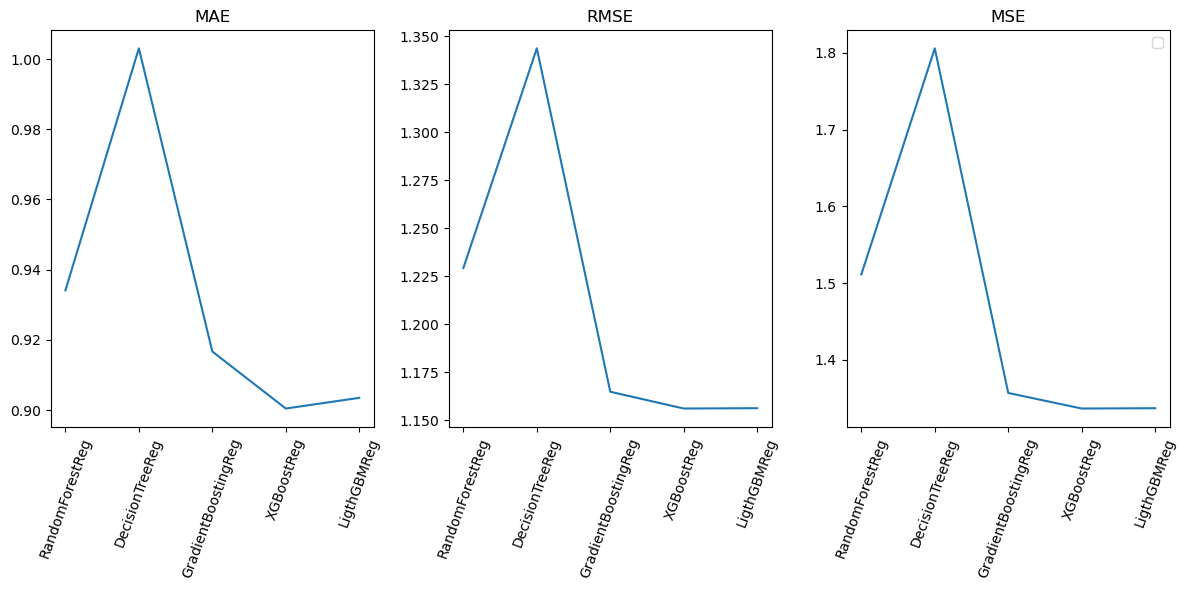

In [32]:
model = ['RandomForestReg','DecisionTreeReg', 'GradientBoostingReg', 'XGBoostReg', 'LigthGBMReg']
mae = [mae_rfr,mae_dtr,mae_gbr, mae_xgb, mae_lgbm]
rmse = [rmse_rfr,rmse_dtr,rmse_gbr, rmse_xgb, rmse_lgbm]
mse = [mse_rfr,mse_dtr,mse_gbr, mse_xgb, mse_lgbm]

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.plot(model,mae)
plt.title('MAE')
plt.xticks(rotation=70)

plt.subplot(1,3,2)
plt.plot(model,rmse)
plt.title('RMSE')
plt.xticks(rotation=70)

plt.subplot(1,3,3)
plt.plot(model, mse)
plt.title('MSE')
plt.xticks(rotation=70)
plt.tight_layout()
plt.legend()
plt.show()

In [37]:
# 교차 검증 
kf = KFold(n_splits=5)
rmse_total = 0
mse_total=0
mae_total=0

for train, valid in kf.split(X_int):
    X_train, X_valid = X_int.iloc[train], X_int.iloc[valid]
    y_train, y_vaild = y_int.iloc[train], y_int.iloc[valid]

    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    rmse = mean_squared_error(y_vaild, y_pred, squared=False)
    mae = mean_absolute_error(y_vaild, y_pred)
    mse = mean_squared_error(y_vaild, y_pred)

    rmse_total += rmse
    mse_total += mse
    mae_total += mae

    print(f'RMSE : {rmse:.3f} / ', end='')
    print(f'MAE : {mae:.3f} / ', end='')
    print(f'MSE : {mse:.3f}')

print(f'RMSE Avg : {rmse_total/5}')
print(f'MSE Avg : {mse_total/5}')
print(f'MAE Avg : {mae_total/5}')

RMSE : 1.173 / MAE : 0.921 / MSE : 1.376
RMSE : 1.152 / MAE : 0.899 / MSE : 1.328
RMSE : 1.106 / MAE : 0.857 / MSE : 1.222
RMSE : 1.130 / MAE : 0.883 / MSE : 1.277
RMSE : 1.219 / MAE : 0.972 / MSE : 1.486
RMSE Avg : 1.1559343595561837
MSE Avg : 1.3376784318832369
MAE Avg : 0.9064182377390562


In [38]:
# Parameter Tuning
param_grid = {
    'n_estimators' : [200,300,400],
    'max_depth' : [5,6,7],
    'learning_rate' : [0.2,0.3,0.4]
}

gridserch = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
gridserch.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [200, 300, 400]},
             scoring='neg_mean_absolute_error', verbose=2)

In [39]:
print(gridserch.best_params_)
print(gridserch.best_score_)
print(gridserch.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}
-0.8909729270565243
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [41]:
model_tuned = XGBRegressor(learning_rate=0.2, max_depth=6, n_estimators=200)
XGBRegressor()
model_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
y_pred_tuned = model_tuned.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = mean_squared_error(y_test, y_pred_tuned)

print(f'MSE_Tuned : {mse_tuned}')
print(f'MAE_Tuned : {mae_tuned}')
print(f'RMSE_Tuned : {rmse_tuned}')

MSE_Tuned : 1.6142310107092017
MAE_Tuned : 1.033135192639067
RMSE_Tuned : 1.6142310107092017


In [43]:
result = {
    'XGB_before': {'MSE': mse_gbr, 'RMSE' : rmse_xgb,'MAE': mae_gbr},
    'XGB_tuned': {'MSE': mse_tuned, 'RMSE' : rmse_tuned,'MAE': mae_tuned},
}
res = pd.DataFrame(result).round(3)
res

,XGB_before,XGB_tuned
MSE,1.357,1.614
RMSE,1.156,1.614
MAE,0.917,1.033


---
## Binary 결과

In [45]:
X_bin = data_bin.drop(['Rating','Unnamed: 0'], axis=1)
y_bin = data_bin['Rating']

In [46]:
std_scaler = StandardScaler().fit_transform(X_bin)
minmax_scaler = MinMaxScaler().fit_transform(X_bin)
robust_scaler = RobustScaler().fit_transform(X_bin)

std_scaled_df_bin = pd.DataFrame(std_scaler, columns=X_bin.columns)
minmax_scaled_df_bin = pd.DataFrame(minmax_scaler, columns=X_bin.columns)
robust_scaled_df_bin = pd.DataFrame(robust_scaler, columns=X_bin.columns)

In [47]:
robust_scaled_df_bin
robust_scaled_df_bin.columns

Index(['Category_0', 'Category_1', 'Category_2', 'Category_3', 'Category_4',
       'Available_Age', 'Size', 'Price', 'Free', 'Reviews'],
      dtype='object')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(robust_scaled_df_bin, y_bin,
                                                    test_size=0.2,
                                                    random_state=13
                                                    )

In [49]:
LR_model = LinearRegression()
RFR_model = RandomForestRegressor()
DTR_model = DecisionTreeRegressor()
GBR_model = GradientBoostingRegressor()
XGB_model = XGBRegressor()
LGBM_model = LGBMRegressor()

In [50]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [51]:
RFR_model.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
DTR_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
GBR_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [54]:
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
LGBM_model.fit(X_train, y_train)

LGBMRegressor()

In [56]:
y_pred_lr = LR_model.predict(X_test)
y_pred_rfr = RFR_model.predict(X_test)
y_pred_dtr = DTR_model.predict(X_test)
y_pred_gbr = GBR_model.predict(X_test)
y_pred_xgb = XGB_model.predict(X_test)
y_pred_lgbm = LGBM_model.predict(X_test)

In [57]:
# Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"RMSE : {rmse_lr:.4f}")
print(f"MAE : {mae_lr:.4f}")
print(f"MSE : {mse_lr:.4f}")

RMSE : 1.1905
MAE : 0.9526
MSE : 1.4174


In [58]:
# RandomForest
rmse_rfr = mean_squared_error(y_test, y_pred_rfr, squared=False)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

print(f"RMSE : {rmse_rfr:.4f}")
print(f"MAE : {mae_rfr:.4f}")
print(f"MSE : {mse_rfr:.4f}")

RMSE : 1.2290
MAE : 0.9342
MSE : 1.5105


In [59]:
# DecisionTreeRegression
rmse_dtr = mean_squared_error(y_test, y_pred_dtr, squared=False)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)

print(f"RMSE : {rmse_dtr:.4f}")
print(f"MAE : {mae_dtr:.4f}")
print(f"MSE : {mse_dtr:.4f}")

RMSE : 1.3452
MAE : 1.0041
MSE : 1.8094


In [60]:
# Gradient Boosting Regression
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

print(f"RMSE : {rmse_gbr:.4f}")
print(f"MAE : {mae_gbr:.4f}")
print(f"MSE : {mse_gbr:.4f}")

RMSE : 1.1693
MAE : 0.9215
MSE : 1.3672


In [61]:
rmse_xgb = mean_squared_error(y_test,y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"RMSE : {rmse_xgb:.4f}")
print(f"MAE : {mae_xgb:.4f}")
print(f"MSE : {mse_xgb:.4f}")

RMSE : 1.1569
MAE : 0.9016
MSE : 1.3385


In [62]:
rmse_lgbm = mean_squared_error(y_test,y_pred_lgbm, squared=False)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

print(f"RMSE : {rmse_lgbm:.4f}")
print(f"MAE : {mae_lgbm:.4f}")
print(f"MSE : {mse_lgbm:.4f}")

RMSE : 1.1566
MAE : 0.9049
MSE : 1.3378


In [63]:
metrics = {
    'Linear Reg': {'MAE': mae_lr, 'RMSE':rmse_lr,'MSE':mse_lr},
    'Random Forest Reg': {'MAE': mae_rfr, 'RMSE': rmse_rfr,'MSE':mse_rfr},
    'Decision Tree Reg': {'MAE': mae_dtr, 'RMSE': rmse_dtr,'MSE':mse_dtr},
    'Gradient Boosting Reg': {'MAE': mae_gbr, 'RMSE': rmse_gbr,'MSE':mse_gbr},
    'XGBoost Reg': {'MAE': mae_xgb, 'RMSE': rmse_xgb,'MSE':mse_xgb},
    'LightGBM Reg': {'MAE': mae_lgbm, 'RMSE': rmse_lgbm,'MSE':mse_lgbm}
}
result = pd.DataFrame(metrics).round(3).T
result
    

,MAE,RMSE,MSE
Linear Reg,0.953,1.191,1.417
Random Forest Reg,0.934,1.229,1.510
Decision Tree Reg,1.004,1.345,1.809
Gradient Boosting Reg,0.922,1.169,1.367
XGBoost Reg,0.902,1.157,1.339
LightGBM Reg,0.905,1.157,1.338


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


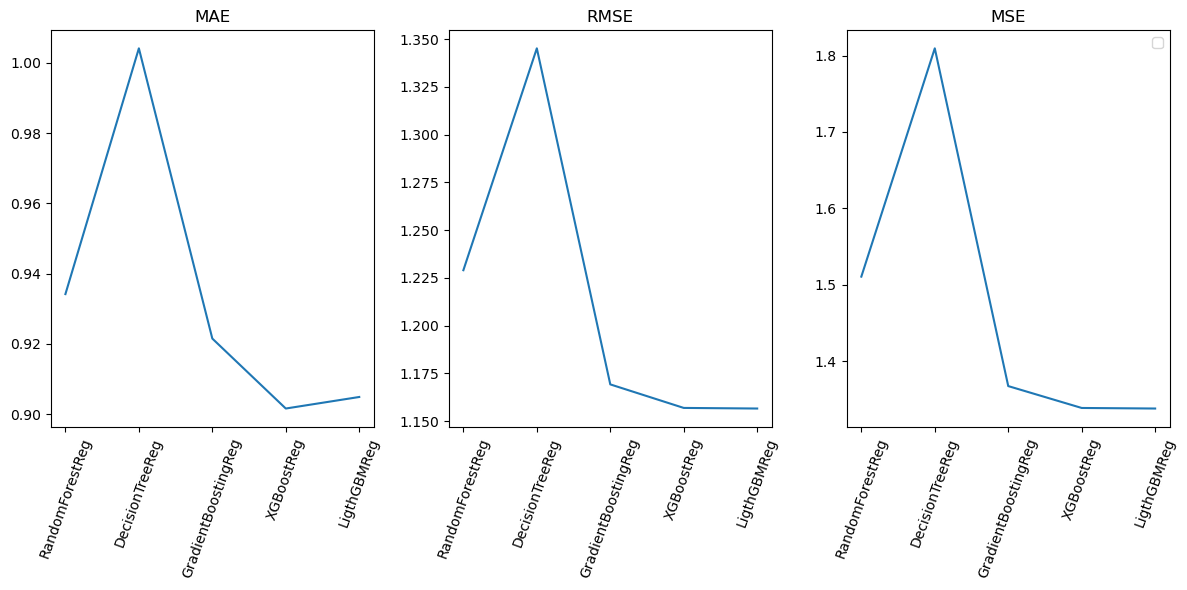

In [64]:
model = ['RandomForestReg','DecisionTreeReg', 'GradientBoostingReg', 'XGBoostReg', 'LigthGBMReg']
mae = [mae_rfr,mae_dtr,mae_gbr, mae_xgb, mae_lgbm]
rmse = [rmse_rfr,rmse_dtr,rmse_gbr, rmse_xgb, rmse_lgbm]
mse = [mse_rfr,mse_dtr,mse_gbr, mse_xgb, mse_lgbm]

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.plot(model,mae)
plt.title('MAE')
plt.xticks(rotation=70)

plt.subplot(1,3,2)
plt.plot(model,rmse)
plt.title('RMSE')
plt.xticks(rotation=70)

plt.subplot(1,3,3)
plt.plot(model, mse)
plt.title('MSE')
plt.xticks(rotation=70)
plt.tight_layout()
plt.legend()
plt.show()

In [65]:
# 교차 검증 
kf = KFold(n_splits=5)
rmse_total = 0
mse_total=0
mae_total=0

for train, valid in kf.split(X_bin):
    X_train, X_valid = X_bin.iloc[train], X_bin.iloc[valid]
    y_train, y_vaild = y_bin.iloc[train], y_bin.iloc[valid]

    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    rmse = mean_squared_error(y_vaild, y_pred, squared=False)
    mae = mean_absolute_error(y_vaild, y_pred)
    mse = mean_squared_error(y_vaild, y_pred)

    rmse_total += rmse
    mse_total += mse
    mae_total += mae

    print(f'RMSE : {rmse:.3f} / ', end='')
    print(f'MAE : {mae:.3f} / ', end='')
    print(f'MSE : {mse:.3f}')

print(f'RMSE Avg : {rmse_total/5}')
print(f'MSE Avg : {mse_total/5}')
print(f'MAE Avg : {mae_total/5}')

RMSE : 1.173 / MAE : 0.923 / MSE : 1.376
RMSE : 1.154 / MAE : 0.901 / MSE : 1.331
RMSE : 1.108 / MAE : 0.862 / MSE : 1.228
RMSE : 1.130 / MAE : 0.884 / MSE : 1.278
RMSE : 1.220 / MAE : 0.975 / MSE : 1.488
RMSE Avg : 1.1570574792828778
MSE Avg : 1.3402394215159894
MAE Avg : 0.90889883100988


In [66]:
param_grid = {
    'n_estimators' : [200,300,400],
    'max_depth' : [5,6,7],
    'learning_rate' : [0.2,0.3,0.4]
}

gridserch = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
gridserch.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [200, 300, 400]},
             scoring='neg_mean_absolute_error', verbose=2)

In [67]:
print(gridserch.best_params_)
print(gridserch.best_score_)
print(gridserch.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
-0.8913457401157345
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [70]:
model_tuned = XGBRegressor(learning_rate=0.2, max_depth=7, n_estimators=200)
model_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
y_pred_tuned = model_tuned.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = mean_squared_error(y_test, y_pred_tuned)

print(f'MSE_Tuned : {mse_tuned}')
print(f'MAE_Tuned : {mae_tuned}')
print(f'RMSE_Tuned : {rmse_tuned}')

MSE_Tuned : 1.7903841902244286
MAE_Tuned : 1.134456617310155
RMSE_Tuned : 1.7903841902244286


In [72]:
result = {
    'XGB_before': {'MSE': mse_gbr, 'RMSE' : rmse_xgb,'MAE': mae_gbr},
    'XGB_tuned': {'MSE': mse_tuned, 'RMSE' : rmse_tuned,'MAE': mae_tuned},
}
res = pd.DataFrame(result).round(3)
res

,XGB_before,XGB_tuned
MSE,1.367,1.790
RMSE,1.157,1.790
MAE,0.922,1.134


---
## One Hot Encoding

In [73]:
data_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546056 entries, 0 to 546055
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       546056 non-null  int64  
 1   Available_Age                    546056 non-null  int64  
 2   Size                             546056 non-null  int64  
 3   Price                            546056 non-null  int64  
 4   Free                             546056 non-null  bool   
 5   Rating                           546056 non-null  float64
 6   Reviews                          546056 non-null  int64  
 7   Category_Book                    546056 non-null  bool   
 8   Category_Business                546056 non-null  bool   
 9   Category_Developer Tools         546056 non-null  bool   
 10  Category_Education               546056 non-null  bool   
 11  Category_Entertainment           546056 non-null  bool   
 12  Ca

In [74]:
X_dum = data_dum.drop(['Rating','Unnamed: 0'], axis=1)
y_dum = data_dum['Rating']

In [75]:
std_scaler = StandardScaler().fit_transform(X_dum)
minmax_scaler = MinMaxScaler().fit_transform(X_dum)
robust_scaler = RobustScaler().fit_transform(X_dum)

std_scaled_df_dum = pd.DataFrame(std_scaler, columns=X_dum.columns)
minmax_scaled_df_dum = pd.DataFrame(minmax_scaler, columns=X_dum.columns)
robust_scaled_df_dum = pd.DataFrame(robust_scaler, columns=X_dum.columns)

In [76]:
robust_scaled_df_dum
robust_scaled_df_dum.columns

Index(['Available_Age', 'Size', 'Price', 'Free', 'Reviews', 'Category_Book',
       'Category_Business', 'Category_Developer Tools', 'Category_Education',
       'Category_Entertainment', 'Category_Finance', 'Category_Food & Drink',
       'Category_Games', 'Category_Graphics & Design',
       'Category_Health & Fitness', 'Category_Lifestyle',
       'Category_Magazines & Newspapers', 'Category_Medical', 'Category_Music',
       'Category_Navigation', 'Category_News', 'Category_Photo & Video',
       'Category_Productivity', 'Category_Reference', 'Category_Shopping',
       'Category_Social Networking', 'Category_Sports', 'Category_Stickers',
       'Category_Travel', 'Category_Utilities', 'Category_Weather'],
      dtype='object')

In [77]:
X_train, X_test, y_train, y_test = train_test_split(robust_scaled_df_dum, y_dum,
                                                    test_size=0.2,
                                                    random_state=13
                                                    )

In [78]:
LR_model = LinearRegression()
RFR_model = RandomForestRegressor()
DTR_model = DecisionTreeRegressor()
GBR_model = GradientBoostingRegressor()
XGB_model = XGBRegressor()
LGBM_model = LGBMRegressor()

In [79]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [80]:
RFR_model.fit(X_train, y_train)

RandomForestRegressor()

In [81]:
DTR_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [82]:
GBR_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [83]:
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [84]:
LGBM_model.fit(X_train, y_train)

LGBMRegressor()

In [85]:
y_pred_lr = LR_model.predict(X_test)
y_pred_rfr = RFR_model.predict(X_test)
y_pred_dtr = DTR_model.predict(X_test)
y_pred_gbr = GBR_model.predict(X_test)
y_pred_xgb = XGB_model.predict(X_test)
y_pred_lgbm = LGBM_model.predict(X_test)

In [86]:
# Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"RMSE : {rmse_lr:.4f}")
print(f"MAE : {mae_lr:.4f}")
print(f"MSE : {mse_lr:.4f}")

RMSE : 1.1832
MAE : 0.9430
MSE : 1.3999


In [87]:
# RandomForest
rmse_rfr = mean_squared_error(y_test, y_pred_rfr, squared=False)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

print(f"RMSE : {rmse_rfr:.4f}")
print(f"MAE : {mae_rfr:.4f}")
print(f"MSE : {mse_rfr:.4f}")

RMSE : 1.2286
MAE : 0.9328
MSE : 1.5095


In [88]:
# DecisionTreeRegression
rmse_dtr = mean_squared_error(y_test, y_pred_dtr, squared=False)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)

print(f"RMSE : {rmse_dtr:.4f}")
print(f"MAE : {mae_dtr:.4f}")
print(f"MSE : {mse_dtr:.4f}")

RMSE : 1.3477
MAE : 1.0058
MSE : 1.8163


In [89]:
# Gradient Boosting Regression
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

print(f"RMSE : {rmse_gbr:.4f}")
print(f"MAE : {mae_gbr:.4f}")
print(f"MSE : {mse_gbr:.4f}")

RMSE : 1.1628
MAE : 0.9150
MSE : 1.3521


In [90]:
rmse_xgb = mean_squared_error(y_test,y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"RMSE : {rmse_xgb:.4f}")
print(f"MAE : {mae_xgb:.4f}")
print(f"MSE : {mse_xgb:.4f}")

RMSE : 1.1552
MAE : 0.8994
MSE : 1.3345


In [91]:
rmse_lgbm = mean_squared_error(y_test,y_pred_lgbm, squared=False)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

print(f"RMSE : {rmse_lgbm:.4f}")
print(f"MAE : {mae_lgbm:.4f}")
print(f"MSE : {mse_lgbm:.4f}")

RMSE : 1.1557
MAE : 0.9033
MSE : 1.3357


In [92]:
metrics = {
    'Linear Reg': {'MAE': mae_lr, 'RMSE':rmse_lr,'MSE':mse_lr},
    'Random Forest Reg': {'MAE': mae_rfr, 'RMSE': rmse_rfr,'MSE':mse_rfr},
    'Decision Tree Reg': {'MAE': mae_dtr, 'RMSE': rmse_dtr,'MSE':mse_dtr},
    'Gradient Boosting Reg': {'MAE': mae_gbr, 'RMSE': rmse_gbr,'MSE':mse_gbr},
    'XGBoost Reg': {'MAE': mae_xgb, 'RMSE': rmse_xgb,'MSE':mse_xgb},
    'LightGBM Reg': {'MAE': mae_lgbm, 'RMSE': rmse_lgbm,'MSE':mse_lgbm}
}
result = pd.DataFrame(metrics).round(3).T
result
    

,MAE,RMSE,MSE
Linear Reg,0.943,1.183,1.400
Random Forest Reg,0.933,1.229,1.510
Decision Tree Reg,1.006,1.348,1.816
Gradient Boosting Reg,0.915,1.163,1.352
XGBoost Reg,0.899,1.155,1.335
LightGBM Reg,0.903,1.156,1.336


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


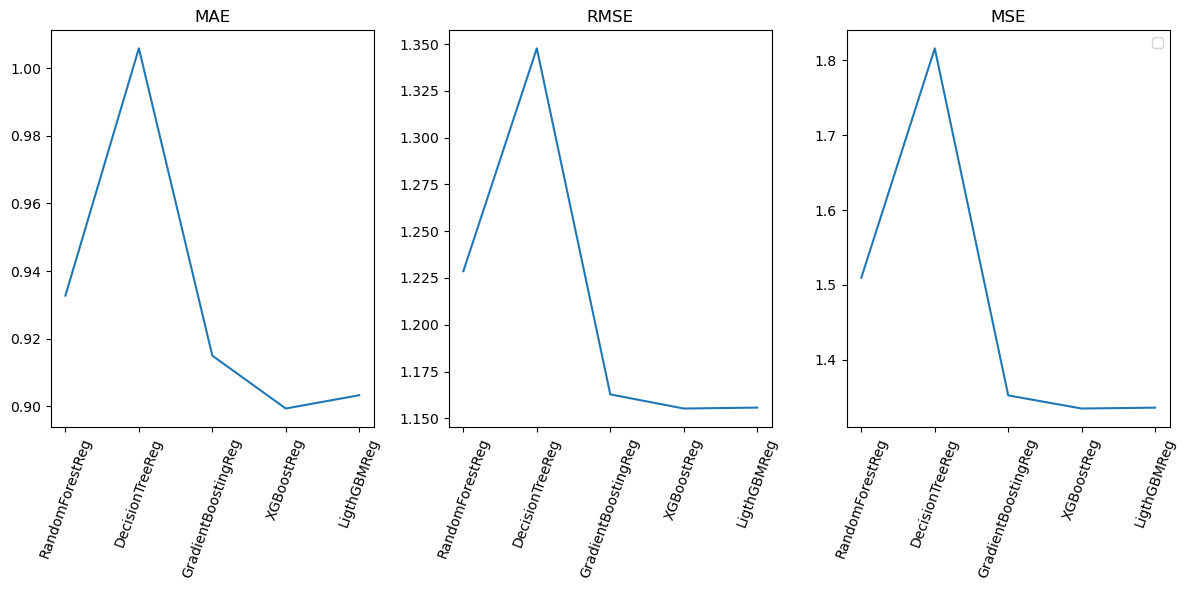

In [93]:
model = ['RandomForestReg','DecisionTreeReg', 'GradientBoostingReg', 'XGBoostReg', 'LigthGBMReg']
mae = [mae_rfr,mae_dtr,mae_gbr, mae_xgb, mae_lgbm]
rmse = [rmse_rfr,rmse_dtr,rmse_gbr, rmse_xgb, rmse_lgbm]
mse = [mse_rfr,mse_dtr,mse_gbr, mse_xgb, mse_lgbm]

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.plot(model,mae)
plt.title('MAE')
plt.xticks(rotation=70)

plt.subplot(1,3,2)
plt.plot(model,rmse)
plt.title('RMSE')
plt.xticks(rotation=70)

plt.subplot(1,3,3)
plt.plot(model, mse)
plt.title('MSE')
plt.xticks(rotation=70)
plt.tight_layout()
plt.legend()
plt.show()

In [94]:
# 교차 검증 
kf = KFold(n_splits=5)
rmse_total = 0
mse_total=0
mae_total=0

for train, valid in kf.split(X_dum):
    X_train, X_valid = X_dum.iloc[train], X_dum.iloc[valid]
    y_train, y_vaild = y_dum.iloc[train], y_dum.iloc[valid]

    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    rmse = mean_squared_error(y_vaild, y_pred, squared=False)
    mae = mean_absolute_error(y_vaild, y_pred)
    mse = mean_squared_error(y_vaild, y_pred)

    rmse_total += rmse
    mse_total += mse
    mae_total += mae

    print(f'RMSE : {rmse:.3f} / ', end='')
    print(f'MAE : {mae:.3f} / ', end='')
    print(f'MSE : {mse:.3f}')

print(f'RMSE Avg : {rmse_total/5}')
print(f'MSE Avg : {mse_total/5}')
print(f'MAE Avg : {mae_total/5}')

RMSE : 1.172 / MAE : 0.920 / MSE : 1.374
RMSE : 1.151 / MAE : 0.899 / MSE : 1.326
RMSE : 1.105 / MAE : 0.853 / MSE : 1.220
RMSE : 1.127 / MAE : 0.877 / MSE : 1.271
RMSE : 1.220 / MAE : 0.972 / MSE : 1.488
RMSE Avg : 1.1550914614724508
MSE Avg : 1.3357942035799455
MAE Avg : 0.9040964552444889


In [95]:
# Parameter Tuning
param_grid = {
    'n_estimators' : [200,300,400],
    'max_depth' : [5,6,7],
    'learning_rate' : [0.2,0.3,0.4]
}

gridserch = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
gridserch.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [200, 300, 400]},
             scoring='neg_mean_absolute_error', verbose=2)

In [96]:
print(gridserch.best_params_)
print(gridserch.best_score_)
print(gridserch.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 400}
-0.8913913261907412
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [98]:
model_tuned = XGBRegressor(learning_rate=0.2, max_depth=5, n_estimators=400)
model_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [99]:
y_pred_tuned = model_tuned.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = mean_squared_error(y_test, y_pred_tuned)

print(f'MSE_Tuned : {mse_tuned}')
print(f'MAE_Tuned : {mae_tuned}')
print(f'RMSE_Tuned : {rmse_tuned}')

MSE_Tuned : 1.8818230541106986
MAE_Tuned : 1.1524076658215525
RMSE_Tuned : 1.8818230541106986


In [100]:
result = {
    'XGB_before': {'MSE': mse_gbr, 'RMSE' : rmse_xgb,'MAE': mae_gbr},
    'XGB_tuned': {'MSE': mse_tuned, 'RMSE' : rmse_tuned,'MAE': mae_tuned},
}
res = pd.DataFrame(result).round(3)
res

,XGB_before,XGB_tuned
MSE,1.352,1.882
RMSE,1.155,1.882
MAE,0.915,1.152


### 모델의 복잡도를 높이면 모델이 이상치를 더 잘 학습하게되어 과적합이 일어날 수 있다.
- train data를 더 만들거나 regularization을 적용하거나, 모델의 구조를 단순화하여 복잡도를 더 낮출 수 있다.
- feature을 조정하는 것도 방법이다. (Category out?)

---

## HyperOpt 써보기

In [82]:
# !pip install hyperopt

In [83]:
# from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# from sklearn.model_selection import cross_val_score, train_test_split


# space = {
#     'n_estimators': hp.choice('n_estimators', range(100, 500)),
#     'max_depth': hp.choice('max_depth', range(3, 6)),
#     'min_samples_split': hp.uniform('min_samples_split', 0.1, 0.5),
#     'learning_rate': hp.uniform('learning_rate', 0.01, 0.07),
#     'loss': hp.choice('loss', ['huber', 'absolute_error'])
# }


In [84]:
# X_train, X_test, y_train, y_test = train_test_split(robust_scaled_df,y, 
#                                                     test_size=0.2,
#                                                     random_state=42)

In [85]:
# # 목적 함수 정의
# def objective(params):
#     regressor = GradientBoostingRegressor(**params)
#     # 교차 검증을 사용하여 모델 평가 (MSE 사용)
#     score = -cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error').mean()
#     return {'loss': score, 'status': STATUS_OK}

In [86]:
# # 최적화 실행
# trials = Trials()
# best_params = fmin(
#     fn=objective,
#     space=space,
#     algo=tpe.suggest,
#     max_evals=100,
#     trials=trials
# )

  5%|▌         | 5/100 [38:40<12:14:51, 464.12s/trial, best loss: 1.38292626451882]  


KeyboardInterrupt: 

In [ ]:
# # 최적화된 모델 훈련 및 평가
# best_regressor = GradientBoostingRegressor(**best_params)
# best_regressor.fit(X_train, y_train)
# y_pred = best_regressor.predict(X_test)

# rmse = mean_squared_error(y_test, y_pred, squared=False)
# mae = mean_absolute_error(y_test, y_pred)
# mape = mean_absolute_percentage_error(y_test, y_pred)
# test_score = best_regressor.score(X_test, y_test)

In [ ]:
# # 결과 출력
# print("최적의 하이퍼파라미터:", best_params)
# print("테스트 세트에서의 점수:", test_score)
# print(f'RMSE : {rmse}')
# print(f'MAE : {mae}')
# print(f'MAPE : {mape}')

---

In [ ]:
# from bokeh.plotting import figure, show

# fruits = ['Apples', 'Pears', 'Kiwis', 'Plums', 'Bananas', 'Strawberries']
# counts = [5,3,6,2,7,10]

# # Sort Values
# sorted_fruits = sorted(fruits, key=lambda x: counts[fruits.index(x)])

# p = figure(x_range=sorted_fruits, height=250, title="Counting Fruits", toolbar_location=None, tools="")

# p.vbar(x=fruits, top=counts, width=0.95)
# p.y_range.start = 0
# p.xgrid.grid_line_color=None
# show(p)